**Tracey Moyston**

I worked alone 

# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

Text(0.5, 1.0, 'Normal Distribution for mu=12 and sigma=2')

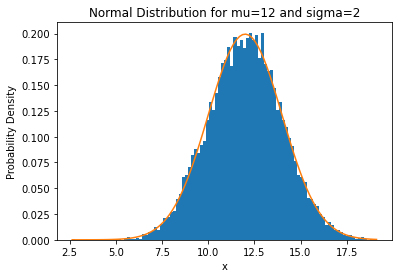

In [48]:
#using a generated normal and t distribution to determine p value 

#importing the packages necessary for this code 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

mu=12; #mean of the population 
sigma=2; #standard deviation of the population 
norm_data=np.random.normal(mu,sigma,10000); #10000 random samples from the population with the above mean and standard
#deviatio. 

x, bins, patches =plt.hist(norm_data,bins=100,density=1) #plots the sampled values where the total density of the graph
#is 1. The x and bins holds the counts information and the bar edge data for each bar. Patches stores info for the bars
plt.plot(bins,stats.norm.pdf(bins,mu,sigma)) #plotting density plot. use norm.pdf to make a pdf distributuin

#adds labels to the plot 
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution for mu=12 and sigma=2')


Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

The t value is -3.904992017354407 and the odds of obtaining a t value less than or equal to it is 0.027
From ttest_1sample Ttest_1sampResult(statistic=-3.9049920173544073, pvalue=0.029880068940888967)


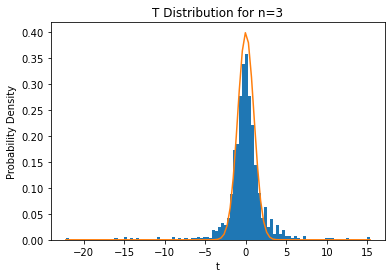

In [54]:
#imports the package random 
import random
histdata=[]; #defines an empty list to which the calculated t values will be added 

for i in range(0,1000): #for loop which iterates 1000 times 
    randvals=[]; #defines an empty list in which the random values will be added 
    randvals.append(norm_data[random.sample(range(len(norm_data)),3)]) #randomly selects 3 values from norm_data
    avg=np.mean(randvals) #finds the average of the random values found 
    stdev=np.std(randvals,ddof=1) #finds the standard deviation of the values found, degree of freedom =1 since sample
    t=((avg-mu)/stdev)*np.sqrt(3) #finds the t value where n=3 
    histdata.append(t) #adds the t values to the list above 



    
x1, bins1, patches1=plt.hist(histdata,bins=100,density=1); #plots a histogram of the t values 
plt.plot(bins1,stats.norm.pdf(bins1)) #plots the density plot for the t distribution


#adds labels to the plot 
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('T Distribution for n=3')

testval= [9.45, 10.3, 11]; # stores the 3 given values in a list
testavg= np.mean(testval) #finds the mean of the sample 
test_stdev=np.std(testval,ddof=1) #finds the standard deviation of the sample 
t_val=((testavg-mu)/test_stdev)*np.sqrt(3) #t value for the given sample 
p=sum(histdata<=t_val)/1000 #for the t values in the distribution, looks for all the values less than or equal to t_val
#sums up and divides by the number of t values in the data set 

#comparing the p value calculated from the t distribution to the ttest function. the values are similar within a 0.005
#range 

print('The t value is',t_val,'and the odds of obtaining a t value less than or equal to it is',p) 
print('From ttest_1sample',stats.ttest_1samp(testval,mu,alternative='less')) 




Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

Text(0.5, 1.0, 'T Distribution for n=6')

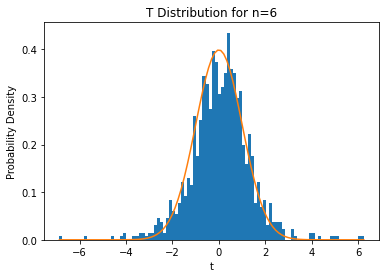

In [51]:
#creating the t distribution using a greater number of samples 

histdata1=[]
for i in range(0,1000):
    randvals1=[]
    randvals1.append(norm_data[random.sample(range(len(norm_data)),6)])
    avg1=np.mean(randvals1)
    stdev1=np.std(randvals1,ddof=1)

    t=((avg1-mu)/stdev1)*np.sqrt(6)
    histdata1.append(t)
    
x2, bins2,patches2=plt.hist(histdata1,bins=100,density=True);
plt.plot(bins2,stats.norm.pdf(bins2))

#adds labels to the plot 
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('T Distribution for n=6')

With a lower sample number the density plot appears to be thinner and more spread out where the higher sample number is less spreasd out and there appears to be more area over a smaller space similar to what is seen in the distribution in step 1.  

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

Text(0.5, 1.0, 'T Distribution for n=3,mu=6,sigma=3')

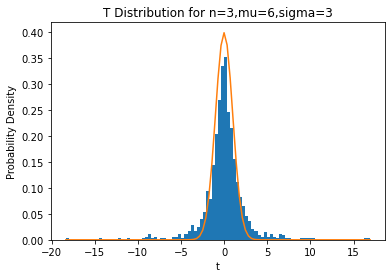

In [59]:
histdata2=[];
mu2=6;
sigma2=3;
for i in range(0,1000):
    randvals2=[]
    randvals2.append(np.random.normal(mu2,sigma2,3)) #samples 3 values from a generated distribution 
    avg2=np.mean(randvals2)
    stdev2=np.std(randvals2,ddof=1)

    t2=((avg2-mu2)/stdev2)*np.sqrt(3)
    histdata2.append(t2)
    
x3, bins3, patche3=plt.hist(histdata2,bins=100,density=True);
plt.plot(bins3,stats.norm.pdf(bins3))

#adds labels to the plot 
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title('T Distribution for n=3,mu=6,sigma=3')

The t distributions in the two problems look similar with similar spread and size.

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **changing the sample number makes the t distribution less thin similar to the distribution in step 1 and changing the mean and standard deviation does not appear to change the t distribution much **
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.